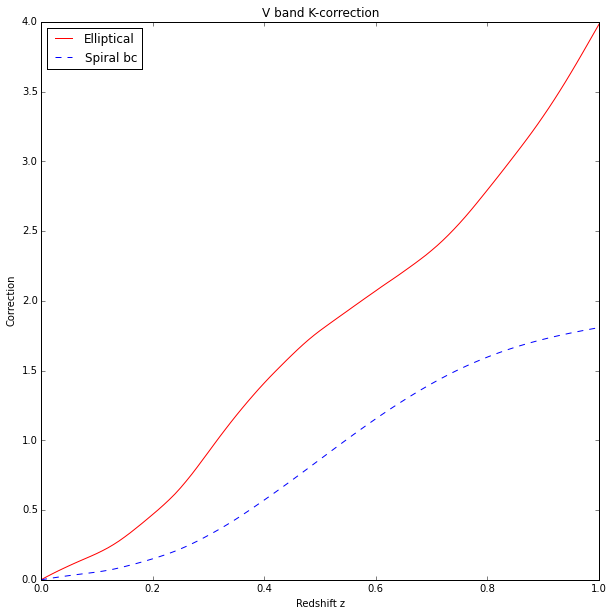

In [1]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456

Cordell Newmiller
Prof. Lubin
PHY 267
Homework 1
Problem 5

Retrieve the three data files from smartsite under 
“Resources/Homework/Homework 1”. 

V.dat contains the V-band response curve R(λ). The columns are the 
wavelength (in Angstroms) and filter efficiency (or fractional throughput). 

E.flux.dat and Sbc.flux.dat contain spectra of an elliptical (E) and spiral 
(Sbc) galaxy. The columns are wavelength (in angstroms) versus flux (or 
intensity).

a) Use these data to calculate the K-correction (KV ) for each galaxy type 
from z = 0 to z = 1. This is the “classic K correction” as presented in Oke 
& Sandage (1968; ApJ, 154, 21) with the generalized form in Hogg et al. 
(2002; astro-ph/0210394). Plot your results.

b) Does your plot of KV versus z agree with the plots in Fukugita et al. 
(1995; PASP, 107, 945)?

Note that the three papers that you will need are available on our 
smartsite webpage under “Resources/Additional Reading/Week 1”.

"""
import numpy
from scipy.integrate import quad
from matplotlib import pyplot
%matplotlib inline

# These files need to be in the working directory
Vband=numpy.loadtxt("V.dat")
RawElliptical=numpy.loadtxt("E.flux.dat")
RawSpiral=numpy.loadtxt("Sbc.flux.dat")


zrange = numpy.arange(0,1.01,0.01)

# Domain of wavelengths to integrate over
domain = Vband[:,0]

# Interpolate the galaxy data so that it can be multiplied with Vband
Elliptical=numpy.interp(domain,RawElliptical[:,0],RawElliptical[:,1])
Spiral=numpy.interp(domain,RawSpiral[:,0],RawSpiral[:,1])


# Oke and Sandage 1968 equation 2
# Hogg 2002 equations 13, 14

KvElliptical=numpy.zeros(zrange.shape)
KvSpiral=numpy.zeros(zrange.shape)
for i in numpy.arange(0,zrange.size):
    ShiftedDomain=domain/(1+zrange[i])
    ShiftedElliptical=numpy.interp(ShiftedDomain,RawElliptical[:,0],
                                   RawElliptical[:,1])
    ShiftedSpiral=numpy.interp(ShiftedDomain,RawSpiral[:,0],RawSpiral[:,1])

    KvElliptical[i]=-2.5*numpy.log10((1/(1+zrange[i]))*numpy.trapz(domain * 
        ShiftedElliptical * Vband[:,1],x=domain)/numpy.trapz(domain * 
        Elliptical * Vband[:,1],x=domain))
    KvSpiral[i]=-2.5*numpy.log10((1/(1+zrange[i]))*numpy.trapz(domain * 
        ShiftedSpiral * Vband[:,1],x=domain)/numpy.trapz(domain * 
        Spiral * Vband[:,1],x=domain))

# Plot resulting corrections
figure1 = pyplot.figure(figsize=(10,10))
pyplot.title('V band K-correction')
pyplot.plot(zrange,KvElliptical,'r-',label='Elliptical')
pyplot.plot(zrange,KvSpiral,'b--',label='Spiral bc')
pyplot.xlabel('Redshift z')
pyplot.ylabel('Correction')
pyplot.legend(loc=2)

# Looks pretty similar to Fukugita's plot!